In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import os

# creating a data frame
df = pd.read_table("C:/Users/Kevin/Desktop/Thesis/ThesisCode/DepthSensing/metric_depth/image_sizes.csv", delimiter =",")

df['true_size'] = df['image_name'].apply(lambda x: int(os.path.basename(os.path.dirname(x))))

df['estimated_size'] = df['estimated_size'].apply(lambda x: x * 100)
df

,image_name,true_size,estimated_size
0,./my_test/input\90\IMG_5149.jpg,90,241.884758
1,./my_test/input\90\IMG_5151.jpg,90,239.142839
2,./my_test/input\90\IMG_5152.jpg,90,298.333239
3,./my_test/input\90\IMG_5154.jpg,90,206.479624
4,./my_test/input\90\IMG_5161.jpg,90,223.857287
...,...,...,...
87,./my_test/input\360\IMG_5140.jpeg,360,837.290047
88,./my_test/input\360\IMG_5141.jpeg,360,656.848522
89,./my_test/input\360\IMG_5143.jpeg,360,814.588030
90,./my_test/input\360\IMG_5144.jpeg,360,888.975513


In [38]:
# Assuming df is your DataFrame containing the data
counts_by_true_size = df['true_size'].value_counts()
counts_by_true_size

true_size
150    27
240    21
90     10
120    10
175     6
210     6
360     5
290     3
115     2
160     2
Name: count, dtype: int64

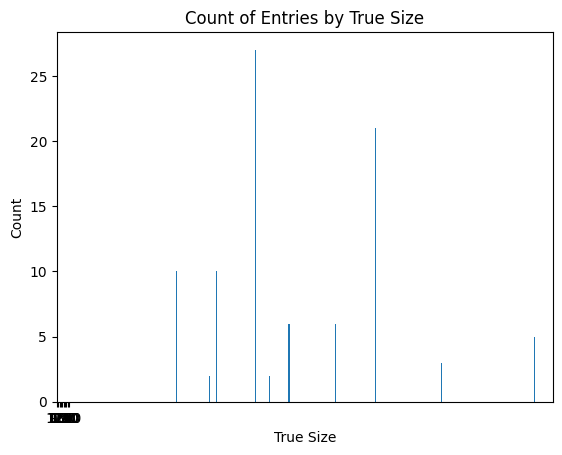

true_size
150    27
240    21
90     10
120    10
175     6
210     6
360     5
290     3
115     2
160     2
Name: count, dtype: int64

In [39]:
import matplotlib.pyplot as plt

# Assuming counts_by_true_size contains the counts of each unique value in the 'true_size' column
counts_by_true_size = df['true_size'].value_counts()

# Plotting the counts using a bar plot
plt.bar(counts_by_true_size.index, counts_by_true_size.values)

# Adding labels and title
plt.xlabel('True Size')
plt.ylabel('Count')
plt.title('Count of Entries by True Size')

folder_sizes = [90, 115, 120, 150,160, 175, 210, 240, 290, 360]
width = 0.8


indices = np.arange(len(folder_sizes))

plt.xticks(indices, 
           [f'{folder_sizes[i]}'.format(i) for i in range(len(folder_sizes))] )


# Show plot
plt.show()
counts_by_true_size


In [40]:
df['size_ratio'] = df['estimated_size'] / df['true_size']
df['recalculated_sizes'] = df['estimated_size'] / df['size_ratio'].mean()

print(df['size_ratio'].mean())

df

2.506900162645096


,image_name,true_size,estimated_size,size_ratio,recalculated_sizes
0,./my_test/input\90\IMG_5149.jpg,90,241.884758,2.687608,96.487591
1,./my_test/input\90\IMG_5151.jpg,90,239.142839,2.657143,95.393843
2,./my_test/input\90\IMG_5152.jpg,90,298.333239,3.314814,119.004835
3,./my_test/input\90\IMG_5154.jpg,90,206.479624,2.294218,82.364518
4,./my_test/input\90\IMG_5161.jpg,90,223.857287,2.487303,89.296451
...,...,...,...,...,...
87,./my_test/input\360\IMG_5140.jpeg,360,837.290047,2.325806,333.994173
88,./my_test/input\360\IMG_5141.jpeg,360,656.848522,1.824579,262.016227
89,./my_test/input\360\IMG_5143.jpeg,360,814.588030,2.262745,324.938361
90,./my_test/input\360\IMG_5144.jpeg,360,888.975513,2.469376,354.611455


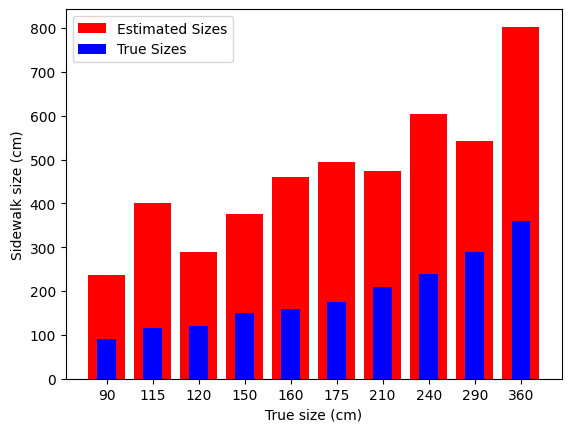

In [41]:
# Group by true_size and calculate mean size_ratio
mean_size_ratio_by_true_size = df.groupby('true_size')['estimated_size'].mean()

folder_sizes = [90, 115, 120, 150,160, 175, 210, 240, 290, 360]
width = 0.8


indices = np.arange(len(folder_sizes))

plt.bar(indices, mean_size_ratio_by_true_size, 
        width=width, color='r', label='Estimated Sizes')

plt.bar(indices, folder_sizes, width=0.5 * width, 
        color='b', label='True Sizes')

plt.xticks(indices, 
           [f'{folder_sizes[i]}'.format(i) for i in range(len(folder_sizes))] )

# Legend for the X axis
plt.xlabel('True size (cm)')

# Legend for the Y axis
plt.ylabel('Sidewalk size (cm)')

plt.legend()
plt.show()

In [42]:
std_by_true_size = df.groupby('true_size')['recalculated_sizes'].std()

mean_size_ratio_by_true_size

mean_recalc_size_ = df.groupby('true_size')['recalculated_sizes'].mean()
mean_recalc_size_

# tr_s / mean_size / std_dev / 

true_size
90      94.115922
115    160.126922
120    114.890120
150    149.719785
160    183.133989
175    197.203900
210    188.640400
240    241.247024
290    216.194133
360    320.280374
Name: recalculated_sizes, dtype: float64

C:\Users\Kevin\AppData\Local\Temp\ipykernel_260\1408567209.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='true_size', y='recalculated_sizes', data=df, palette='Set2')


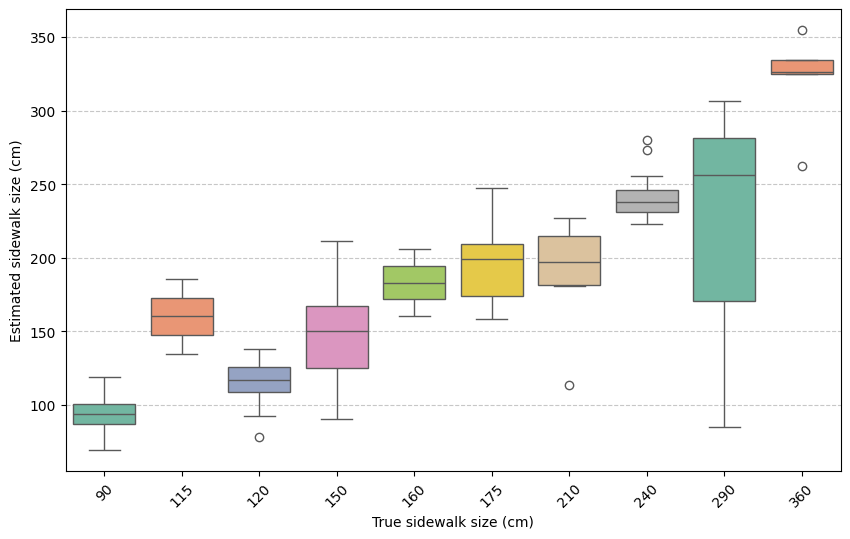

In [43]:
# Assuming you have a DataFrame df with columns 'true_size' and 'recalculated_sizes'

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='true_size', y='recalculated_sizes', data=df, palette='Set2')
plt.xlabel('True sidewalk size (cm)')
plt.ylabel('Estimated sidewalk size (cm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

C:\Users\Kevin\AppData\Local\Temp\ipykernel_260\2211013400.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['true_size'],df['recalculated_sizes'],c=colors, cmap='viridis')


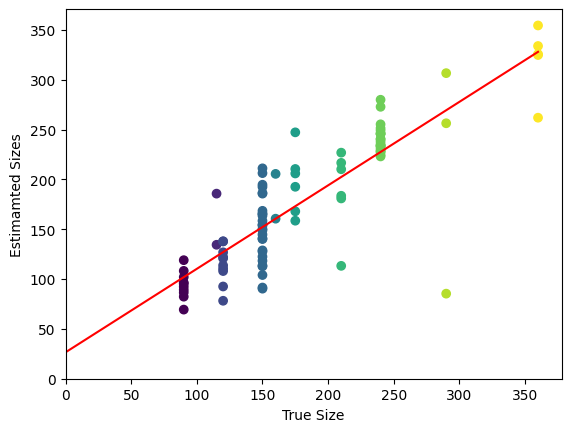

[[1.         0.85641774]
 [0.85641774 1.        ]]


In [44]:




# Create a dictionary to map true_size values to colors
color_map = {}
unique_true_sizes = df['true_size'].unique()
num_colors = len(unique_true_sizes)
color_values = plt.cm.viridis(np.linspace(0, 1, num_colors))  # Adjust colormap as needed

for i, size in enumerate(unique_true_sizes):
    color_map[size] = color_values[i]

# Scatter plot with different colors for each true_size
colors = [color_map[size] for size in df['true_size']]

plt.scatter(df['true_size'],df['recalculated_sizes'],c=colors, cmap='viridis')

# Fit a linear regression line
m, b = np.polyfit(df['true_size'], df['recalculated_sizes'], 1)

# Calculate endpoints of the regression line
x_min = 0
x_max = df['true_size'].max()
y_min = m * x_min + b
y_max = m * x_max + b


# Plotting the regression line
plt.plot([x_min, x_max], [y_min, y_max], color='red')

# Set x and y axis limits to start from 0
plt.xlim(0)
plt.ylim(0)

# Add labels and title
plt.xlabel('True Size')
plt.ylabel('Estimamted Sizes')


# Show plot
plt.show()

R = np.corrcoef(df['true_size'],df['recalculated_sizes'])

print(R)

In [45]:
# Predicted recalculated_sizes using the regression line
predicted_recalculated_sizes = m * df['true_size'] + b

# Calculate mean squared error
mse = np.mean((df['true_size'] - df['recalculated_sizes']) ** 2)

print("Mean Squared Error (MSE):", mse)

# Calculate mean absolute error
mae = np.mean(np.abs(df['true_size'] - df['recalculated_sizes']))

print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 1322.7223300725852
Mean Absolute Error (MAE): 23.34260886258877


In [46]:
# Assuming df is your DataFrame containing 'true_size' and 'recalculated_sizes' columns

# Group by 'true_size'
grouped = df.groupby('true_size')

# Calculate MSE for each group
mse_per_group = grouped.apply(lambda x: np.mean((x['true_size'] - x['recalculated_sizes']) ** 2))

# Calculate MAE for each group
mae_per_group = grouped.apply(lambda x: np.mean(np.abs(x['true_size'] - x['recalculated_sizes'])))

print("Mean Squared Error (MSE) per unique true_size:")
print(mse_per_group)

print("\nMean Absolute Error (MAE) per unique true_size:")
print(mae_per_group)

Mean Squared Error (MSE) per unique true_size:
true_size
90       189.240590
115     2695.415420
120      345.586456
150     1080.789448
160     1040.801451
175     1347.589961
210     1869.919875
240      209.993946
290    14423.744294
360     2540.454056
dtype: float64

Mean Absolute Error (MAE) per unique true_size:
true_size
90     10.605734
115    45.126922
120    14.224302
150    26.795204
160    23.133989
175    29.984724
210    29.335743
240    10.942267
290    84.972924
360    39.719626
dtype: float64


C:\Users\Kevin\AppData\Local\Temp\ipykernel_260\553871815.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mse_per_group = grouped.apply(lambda x: np.mean((x['true_size'] - x['recalculated_sizes']) ** 2))
C:\Users\Kevin\AppData\Local\Temp\ipykernel_260\553871815.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mae_per_group = grouped.apply(lambda x: np.mean(np.abs(x['true_size'] - x['recalculated_siz

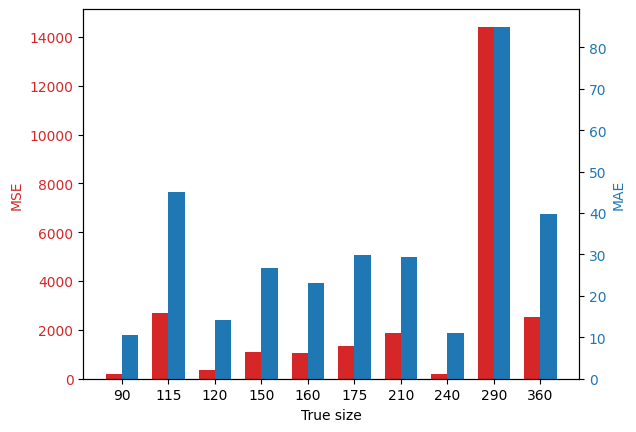

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# X values
true_sizes = sorted(df['true_size'].unique())  # Sort the unique sizes

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Define positions for each group on the x-axis
positions = np.arange(len(true_sizes))

# Define the width of each bar
bar_width = 0.35  # You can adjust this value as needed

# Plot MSE
color = 'tab:red'
ax1.set_xlabel('True size')
ax1.set_ylabel('MSE', color=color)
ax1.bar(positions - bar_width/2, mse_per_group,bar_width, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a twin Axes sharing the x-axis
ax2 = ax1.twinx()

# Plot MAE
color = 'tab:blue'
ax2.set_ylabel('MAE', color=color,)
ax2.bar(positions + bar_width/2, mae_per_group,bar_width, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Set x-axis ticks and labels

plt.xticks(positions, true_sizes)

# Show plot
plt.show()
